In [1]:
# libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diamond.csv')
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


# Data preparation

In [4]:
# isolate X and Y
# y -> dependent variable
y = df['price']
X = df['carat']

In [8]:
# adding constant 
X = sm.add_constant(X)
X.head()

,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


# Linear Regression

In [11]:
# regression model
model1 = sm.OLS(endog=y, exog=X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):          3.04e-150
Time:                        13:52:31   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'Price')

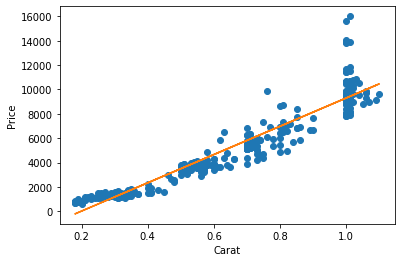

In [18]:
# plotting
X = df['carat']
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b * X + a)
plt.xlabel('Carat')
plt.ylabel('Price')

# Linear Regression with dummy variable

In [20]:
df['carat'].describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [23]:
df['caratbinary'] = np.where(df['carat'] > 0.6, 1, 0);
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price,caratbinary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


In [25]:
X = df['caratbinary']
y = df['price']
X = sm.add_constant(X)

In [31]:
model2 = sm.OLS(endog=y, exog=X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.79e-73
Time:                        16:20:30   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2225.2303    161.442     13.783      

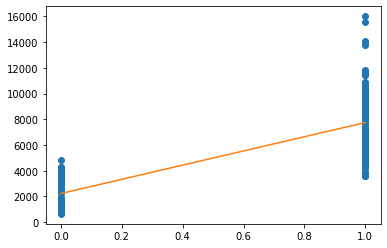

In [39]:
X = df['caratbinary']
plt.plot(X, y, 'o')
m, c = np.polyfit(X, y, 1)
plt.plot(X, m * X + c)